# MML Assignment 1
##### Submitted by - Kantimahanty Rohit (MT2022149)

![Question 2](./mmlq2.png)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1. Generating the data

In [2]:
#genrating 200 datapoints uniformly spaced in the interval [-1,1]
X = np.linspace(-1, 1, 200)

#y takes +1 when -0.5<=xi<0.1 or 0.5<=xi
#and -1 otherwise
Y = np.array([1 if (x>=-0.5 and x<0.1)or(x>=0.5) else -1 for x in X])

# print(X, Y)
print(X.shape, Y.shape)
print(type(X), type(Y))

(200,) (200,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


plotting the graph

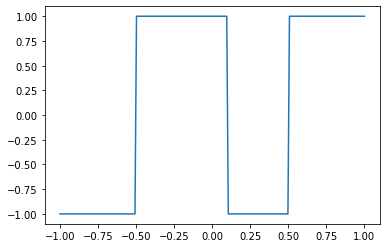

In [3]:
plt.plot(X,Y)

### 2. Solving the problem

![question2a](./part2a.png)

##### 2(a). calculating error rate for each degree using polyfit function

In [4]:
from numpy.polynomial import Polynomial
from sklearn.metrics import accuracy_score

The function NumPy.polyfit() helps us by finding the least square polynomial fit. This means finding the best fitting curve to a given set of points by minimizing the sum of squares. It takes 3 different inputs from the user, namely X, Y, and the polynomial degree.

for reference on what polyfit and polyval does https://www.mathworks.com/help/matlab/ref/polyfit.html

In [5]:

error = []
predictions = []
sign_predictions = []
y_coeff_for_deg3 = np.zeros(9)

for i in range(0,9):
    p = np.polyfit(X,Y,i)
    # print(p) 

    ################################
    #storing the coefficients when deg = 3 to be used later
    if i==3:
        y_coeff_for_deg3 = p
    ################################

    y = np.polyval(p,X)
    predictions.append(y)
    #sign(f(x)) for sign predictions
    sign_predictions.append(np.sign(y))

    # calculating error
    error_rate = 1 - accuracy_score(Y, np.sign(y)) # calcualte error rate
    error.append(error_rate*100)

    

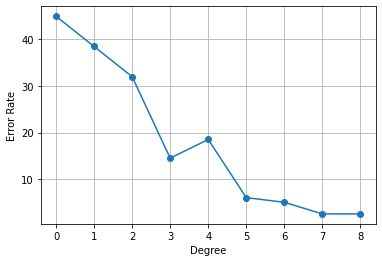

In [6]:
plt.plot(error, marker="o")
plt.xlabel("Degree")
plt.ylabel("Error Rate")
plt.grid()

##### Answer to question 2a

Yes, the error rate decreases when we increase the degree but  
at degree 3 and 4 this trend is not followed , that is error increases when we increase the degree.

![question 2b](./part2b.png)

##### 2(b). For each degree, plotting f(x) and sign(f(x))

---------- for degree = 0 ----------


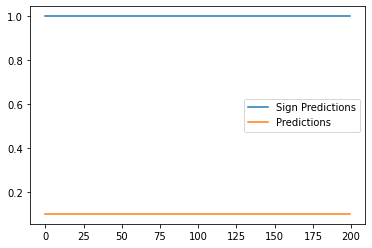

---------- for degree = 1 ----------


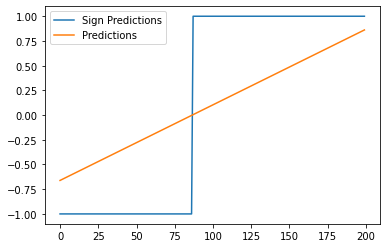

---------- for degree = 2 ----------


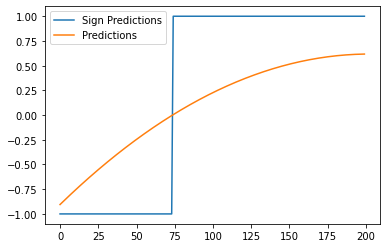

---------- for degree = 3 ----------


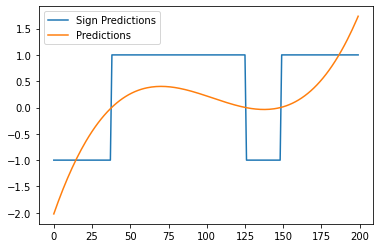

---------- for degree = 4 ----------


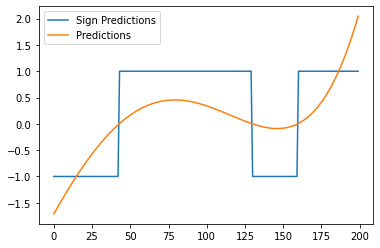

---------- for degree = 5 ----------


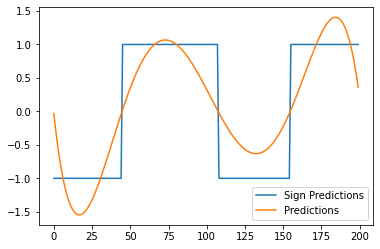

---------- for degree = 6 ----------


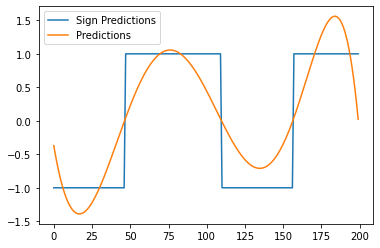

---------- for degree = 7 ----------


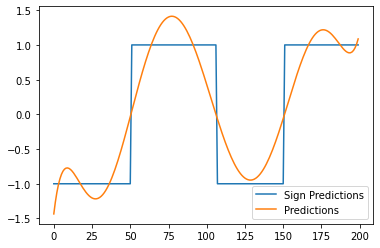

---------- for degree = 8 ----------


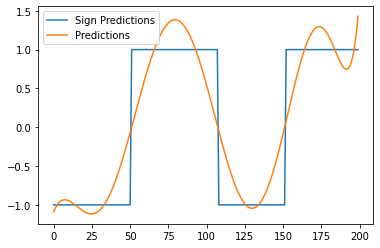

In [7]:
for i in range(0,9):
    plt.plot(sign_predictions[i], label="Sign Predictions")
    plt.plot(predictions[i], label = "Predictions")
    print(f'---------- for degree = {i} ----------')
    plt.legend()
    plt.show()

![question 2c](./part2c.png)

for this we need to check the values of c

new classifier given is:  
f(x) = c(x+0.5)(x-0.1)(x-0.5)

200
---------- for the value of c = 1 ----------



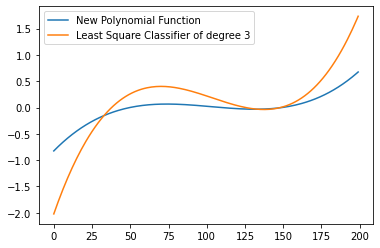

---------- for the value of c = 2 ----------



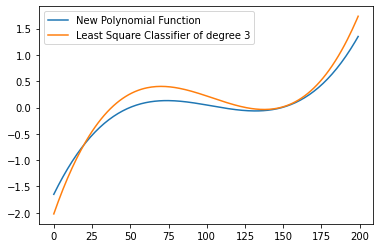

---------- for the value of c = 3 ----------



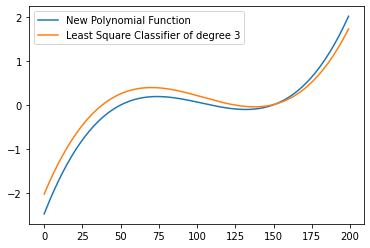

---------- for the value of c = 4 ----------



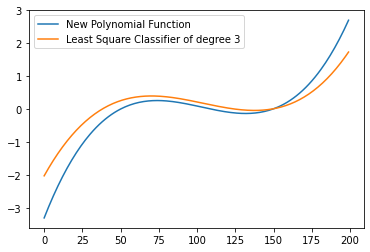

In [8]:
#predictions for our new polynomial
print(len(X))
for c in range(1,5):
    pred=[]
    for x in X:
        y_new = c*(x+0.5)*(x-0.1)*(x-0.5)
        pred.append(y_new)
        # print(len(pred))

    print(f'---------- for the value of c = {c} ----------\n')
    plt.plot(pred, label="New Polynomial Function")
    #predictions store all the predictions but predictions[3] stores the cubic predictions
    plt.plot(predictions[3], label="Least Square Classifier of degree 3") 
    plt.legend()
    plt.show()


From the above graphs it is clearly visible that for value of c=3 we get the closest graphs

printing the most optimal weights for degree 3 of our least square classifier

In [9]:
print(y_coeff_for_deg3)
# y_coeff_for_deg3

[ 2.83580921 -0.36759273 -0.95733457  0.22376238]


##### Answer 2c

The most optimal weights for degree 3 are  
2.83580921, -0.36759273, -0.95733457,  0.22376238  
but when we calculate the coefficiants manually with c=3 we get values  
0.075, -0.75, -0.3, 3

So we can see that there is a slight difference in the values.

we can verify the above statement by plotting them

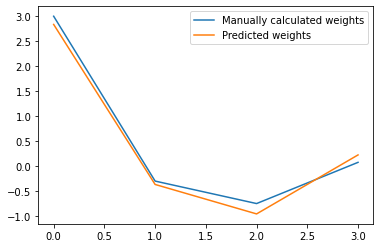

In [10]:
W = [3, -0.3, -0.75, 0.075]
#now plotting the weight difference
plt.plot(W, label="Manually calculated weights")
plt.plot(y_coeff_for_deg3, label="Predicted weights")
plt.legend()
plt.show()

##### Hence it is not possible to classify the data using the given classifier perfectly

### 3. Answers

- (2a) Yes, the error rate decreases when we increase the degree but  
at degree 3 and 4 this trend is not followed , that is error increases when we increase the degree.
- (2b) Plotted the graph
- (2c) It is not possible to classify the data using the given classifier perfectly
